<a href="https://colab.research.google.com/github/JaiSuryaPrabu/deep_learning/blob/main/1_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing package

In [9]:
import torch
from torch import nn
from matplotlib import pyplot as plt

torch.__version__

'2.0.1+cu118'

# Data 

In [6]:
# create a data
weights = 0.7
bias = 0.3

# X is features and y is labels
X = torch.arange(start = 0,end = 1, step = 0.01)
y = weights * X + bias

print(X.shape,y.shape)

torch.Size([100]) torch.Size([100])


In [8]:
# splitting the data
training_percent = 0.75
# 75 percent is training data and 25 percent is testing data
num_of_training = int(training_percent * len(X))
print(num_of_training)

x_train,x_test = X[:num_of_training],X[num_of_training:]
y_train,y_test = y[:num_of_training],y[num_of_training:]

x_train.shape,x_test.shape,y_train.shape,y_test.shape

75


(torch.Size([75]), torch.Size([25]), torch.Size([75]), torch.Size([25]))

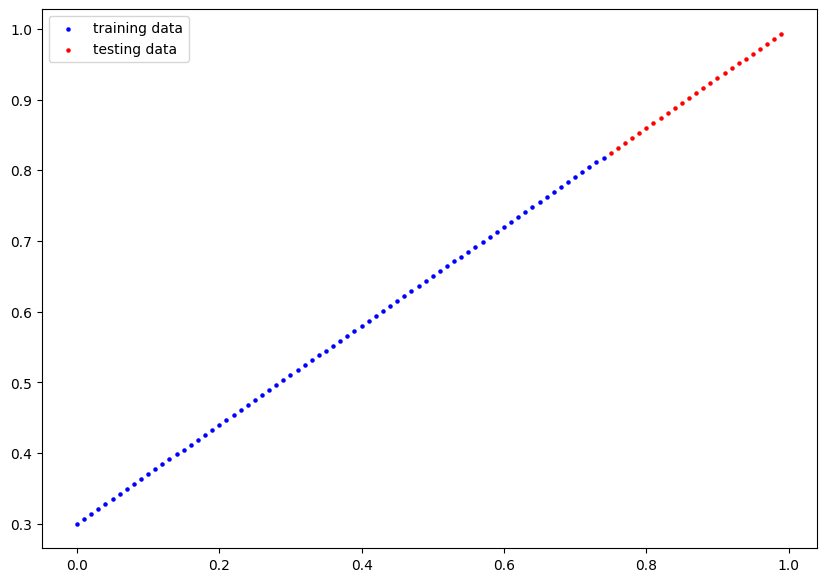

In [12]:
# ploting the data
def plot_graph(Xtrain_data=x_train,
               Xtest_data=x_test,
               Ytrain_data=y_train,
               Ytest_data=y_test,
               predictions=None):
    
    plt.figure(figsize=(10,7))

    # plotting training data
    plt.scatter(Xtrain_data,Ytrain_data,c="b",s=5,label="training data")

    # testing data
    plt.scatter(Xtest_data,Ytest_data,c="r",s=5,label="testing data")

    if predictions is not None:
        plt.scatter(Xtest_data,predictions,c='g',s=5,label="predictions")

    plt.legend(prop={"size":10})

plot_graph()

# Build model


In [23]:
# building a linear regression in pytorch

class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float,requires_grad=True))

    def forward(self,input):
        output = self.weights * input + self.bias
        return output

In [24]:
torch.manual_seed(42)
model = LinearRegression()

# to see the values of parameter such as weighs and bias
print(model.weights.data)
print(model.bias.data)

print(model.parameters())
print(model.state_dict())

tensor([0.3367])
tensor([0.1288])
<generator object Module.parameters at 0x7f2a6c2d7df0>
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


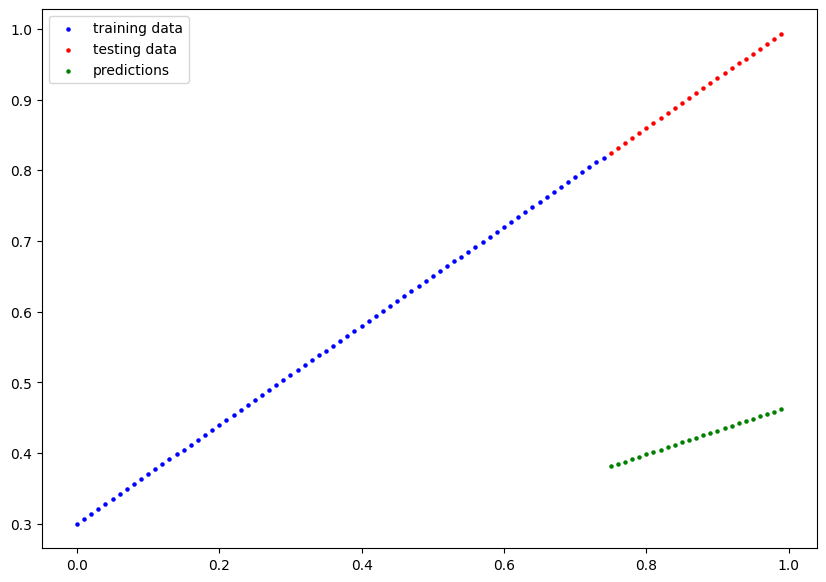

In [21]:
# try to use parameters() and the state_dict()

# predicting the test data without optimization

with torch.inference_mode():
    y_preds = model(x_test)

    plot_graph(predictions=y_preds)

# Train model

* Loss functions 
    * Regression - Mean Absolute Error - `torch.nn.L1Loss()`
    * Classification - Binary Cross Entropy - `torch.nn.BCELoss()`
* Optimizer
    * Stochastic gradient descent - `torch.optim.SGD()`
    * Adam - `torch.optim.Adam()`

In [25]:
# creating a loss function and optimizer

loss = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

## Training Loop

1. Forward pass
    * `model(x_train)`
2. Calculate the loss
    * `loss = loss(y_pred,y_train)`
3. Zero gradients
    * Each training steps needs 0 gradient values so it needs to be refreshed
    *   `optimizer.zero_grad()`
4. Perform backpropagation on loss
    * `loss.backward()`
5. Update the optimizer 
    * `optimizer.step()`

## Testing loop

1. Forward pass
2. Calculate loss
3. Calculate evaluation metrics (optional)

In [29]:
# training the model

epochs = 150

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):

    # training phase

    # training mode
    model.train()

    # 1. Forward pass
    predicted = model(x_train)

    # 2. Calculate the loss
    loss_value = loss(predicted,y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. loss backpropagation
    loss_value.backward()

    # 5. Updata optimizer
    optimizer.step()

    # testing phase at every 1/10 of training

    if epoch % 10 == 0:
        with torch.inference_mode():
            test_pred = model(x_test)
            test_loss = loss(test_pred,y_test.type(torch.float))
            epoch_count.append(epoch)
            train_loss_values.append(loss_value.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch {epoch} Training Loss {loss_value} Testing loss {test_loss}")

Epoch 0 Training Loss 0.2942461669445038 Testing loss 0.46083199977874756
Epoch 10 Training Loss 0.18055614829063416 Testing loss 0.3286420404911041
Epoch 20 Training Loss 0.07795001566410065 Testing loss 0.20529867708683014
Epoch 30 Training Loss 0.04955681413412094 Testing loss 0.14155007898807526
Epoch 40 Training Loss 0.04368527978658676 Testing loss 0.11515693366527557
Epoch 50 Training Loss 0.04042576253414154 Testing loss 0.10273885726928711
Epoch 60 Training Loss 0.03734460100531578 Testing loss 0.09459733217954636
Epoch 70 Training Loss 0.03427761048078537 Testing loss 0.08645584434270859
Epoch 80 Training Loss 0.03120969794690609 Testing loss 0.07867151498794556
Epoch 90 Training Loss 0.02814178168773651 Testing loss 0.07088716328144073
Epoch 100 Training Loss 0.025073867291212082 Testing loss 0.0631028339266777
Epoch 110 Training Loss 0.022005952894687653 Testing loss 0.05531850829720497
Epoch 120 Training Loss 0.018938036635518074 Testing loss 0.04753417149186134
Epoch 130 

## Plotting the loss

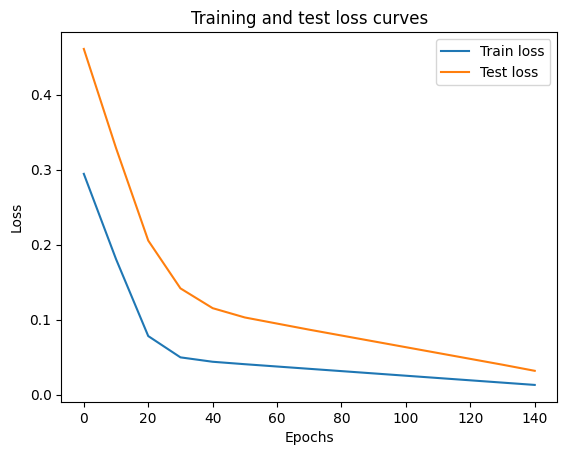

In [30]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

# Predcitions of trained model

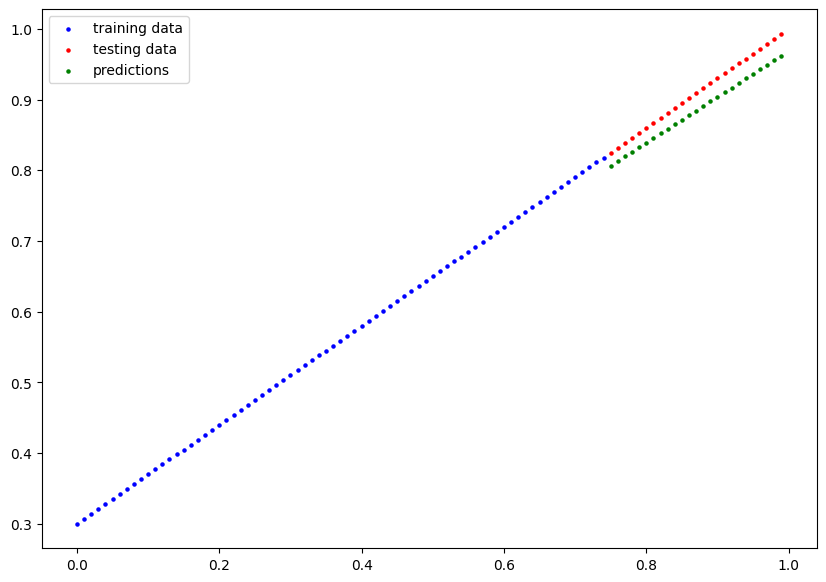

In [32]:
with torch.inference_mode():
    y_preds = model(x_test)

    plot_graph(predictions=y_preds)

# Saving and loading

The three methods are :    
* `torch.save`
* `torch.load`
* `torch.nn.Module.load_state_dict`

## Saving

In [33]:
# saving the state_dict of the model
model_name = "Model.pth"
torch.save(obj = model.state_dict(),f=model_name)

## Loading

In [34]:
# create a new model
new_model = LinearRegression()

new_model.load_state_dict(torch.load(f=model_name))

<All keys matched successfully>

In [36]:
# checking the two models parameters
model.state_dict(),new_model.state_dict()

(OrderedDict([('weights', tensor([0.6483])), ('bias', tensor([0.3204]))]),
 OrderedDict([('weights', tensor([0.6483])), ('bias', tensor([0.3204]))]))